In [1]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis

import numpy as np
from shutil import copyfile

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
# Land art image data downloaded from http://basiclandart.tumblr.com/
# Create a randomly sampled test set for each land type

#for i in ['plains', 'island', 'swamp', 'mountain', 'forest']:
#    
#    folder = "data/" + i
#    test_folder = "test_set/" + i + "/"
#    train_folder = "training_set/" + i + "/"
#    
#    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
#    
#    np.random.shuffle(files)
#    
#    test_files = files[:20]
#    train_files = files[20:]
#    
#    for t in test_files:
#        
#        test_file = folder + "/" + t        
#        copyfile(test_file, test_folder + t)
#        
#    for t in train_files:
#        
#        train_file = folder + "/" + t        
#        copyfile(train_file, train_folder + t)


Working with 194 images
Image examples: 
basiclandart_plains_tumblr_o1vj2m6mIx1v6w6n4o1_640.jpg


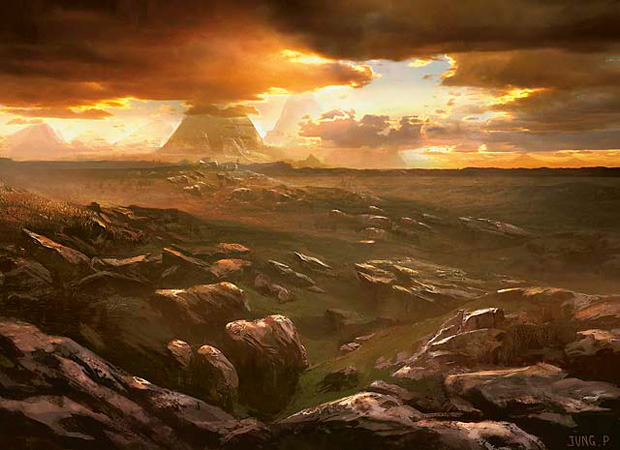

basiclandart_plains_tumblr_o1pza8KNck1v6w6n4o1_640.jpg


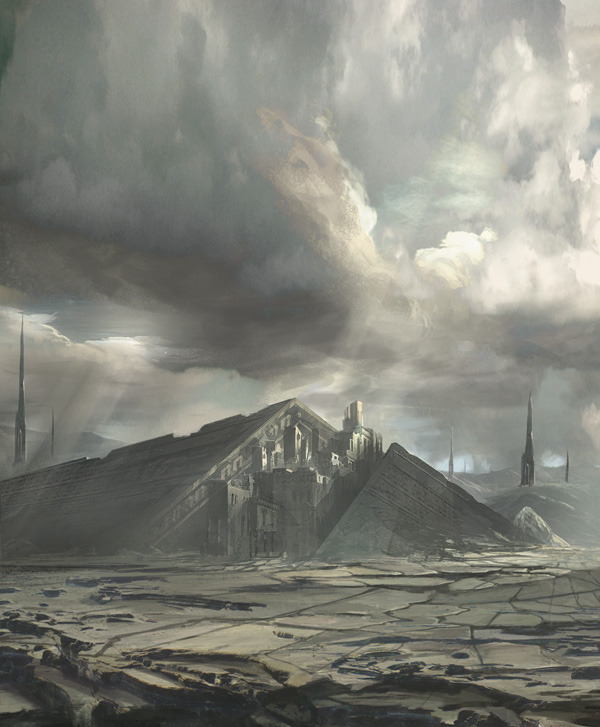

Working with 174 images
Image examples: 
basiclandart_plains_tumblr_o1vhh0s0K11v6w6n4o1_1280.jpg


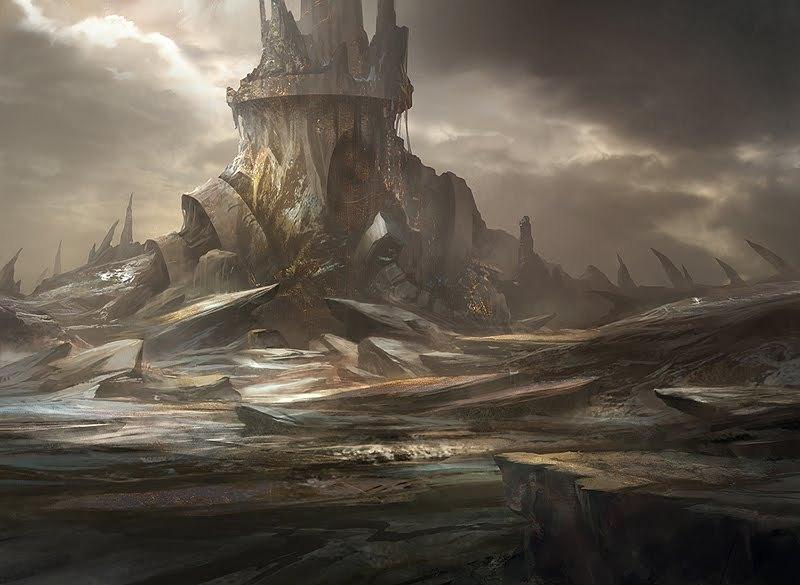

basiclandart_plains_tumblr_o1kfnalCVs1v6w6n4o1_400.jpg


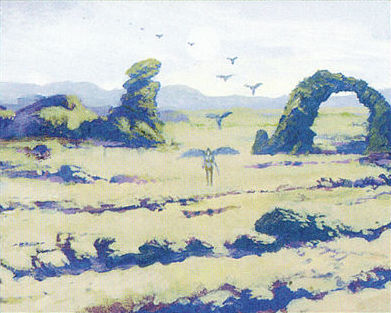

Working with 20 images
Image examples: 
basiclandart_plains_tumblr_o1m8waA4zX1v6w6n4o1_640.jpg


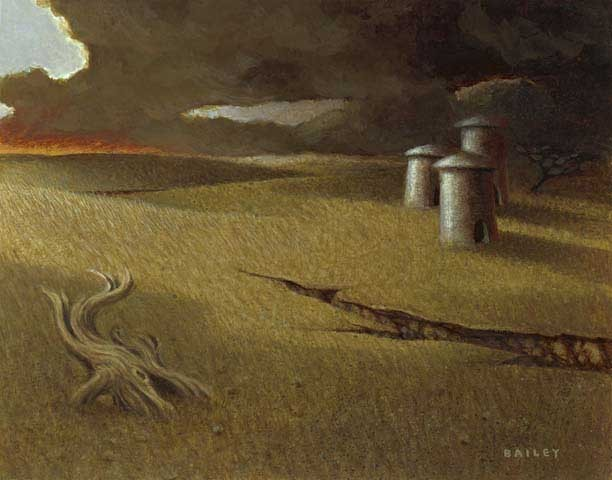

basiclandart_plains_tumblr_o1q7q3FbSf1v6w6n4o1_1280.jpg


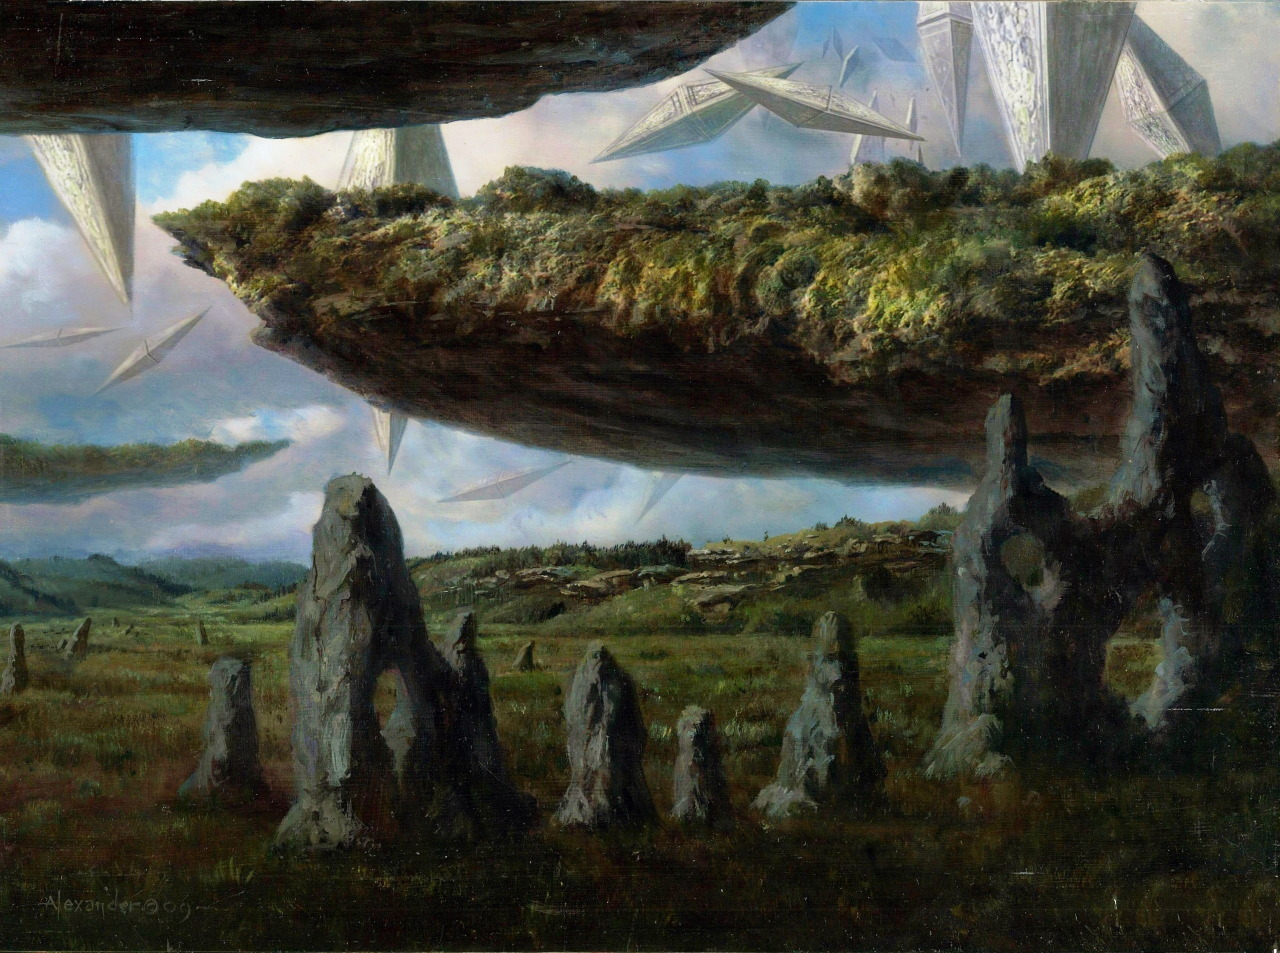

Working with 194 images
Image examples: 
basiclandart_island_tumblr_o1m9wyVSvX1v6w6n4o1_640.jpg


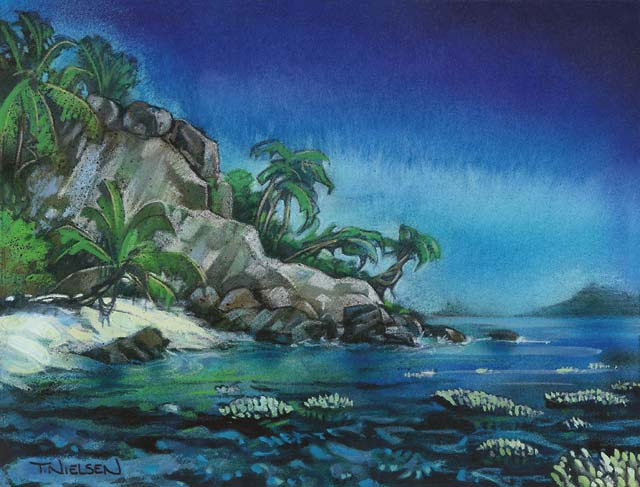

basiclandart_island_tumblr_osdazzgmNL1v6w6n4o1_1280.png


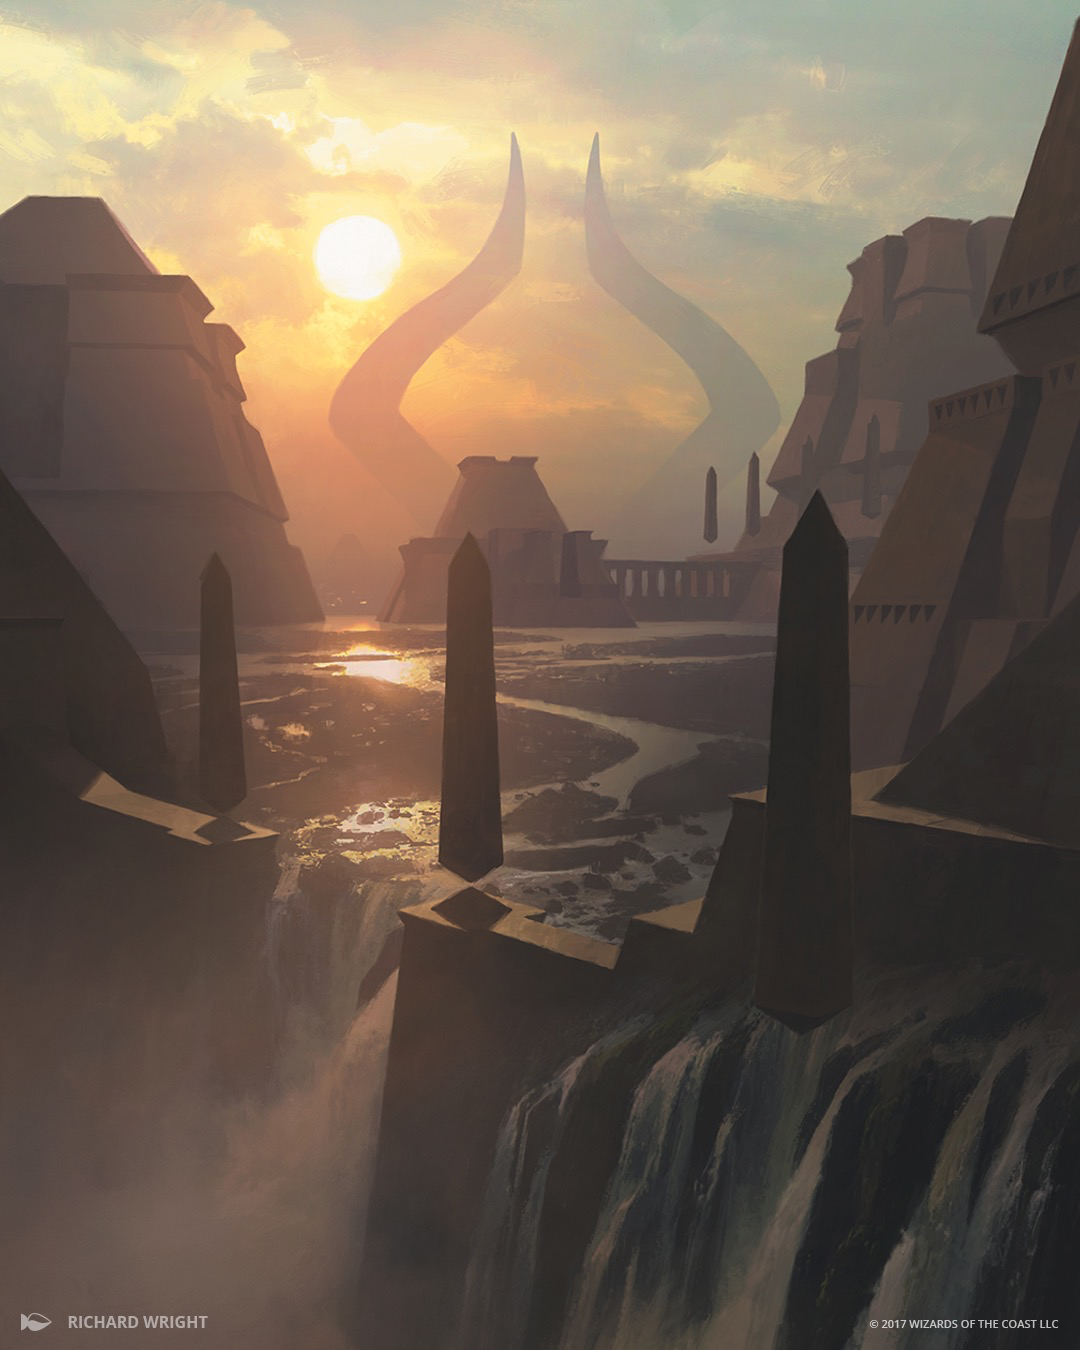

Working with 174 images
Image examples: 
basiclandart_island_tumblr_o1m9wyVSvX1v6w6n4o1_640.jpg


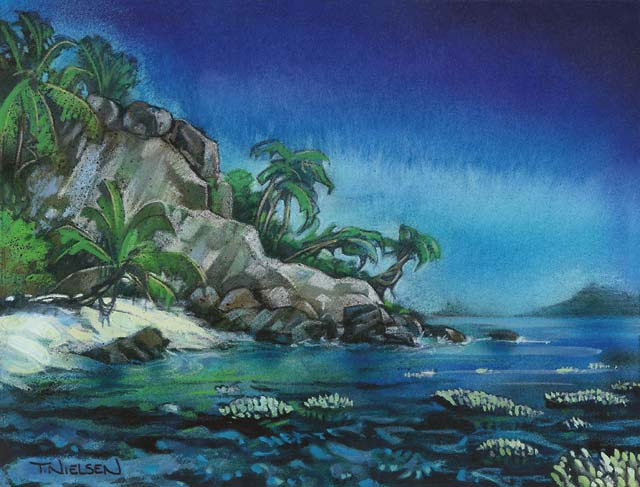

basiclandart_island_tumblr_osdazzgmNL1v6w6n4o1_1280.png


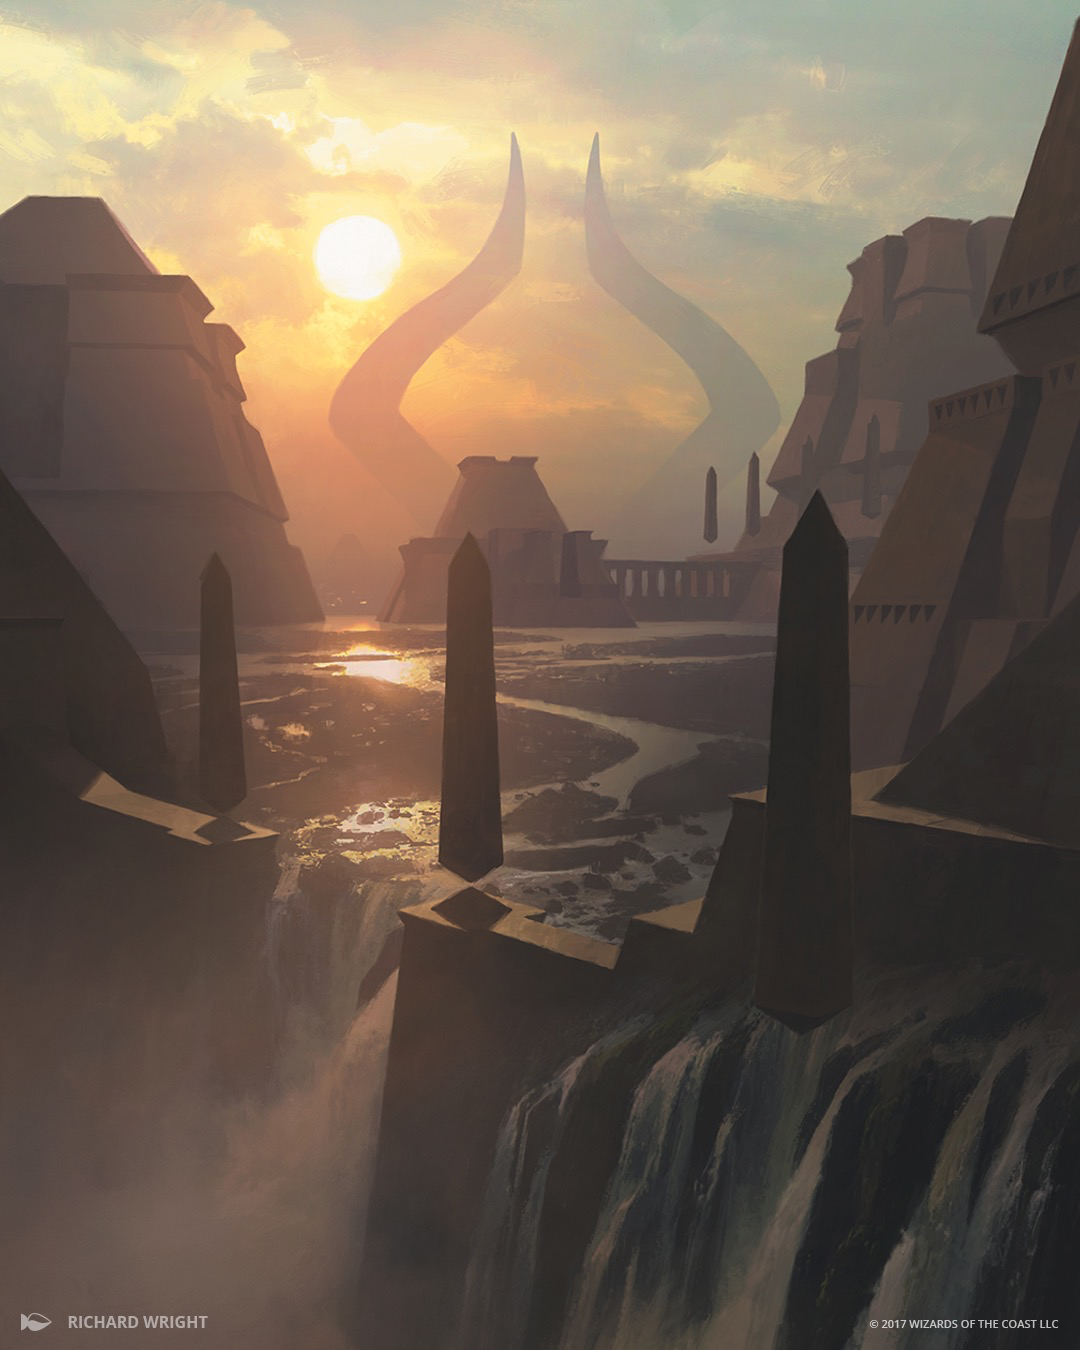

Working with 20 images
Image examples: 
basiclandart_island_tumblr_o1o51tYcWE1v6w6n4o1_640.jpg


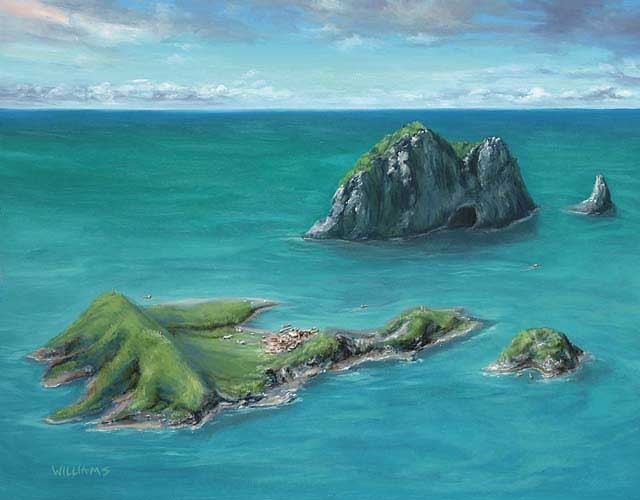

basiclandart_island_tumblr_o1o7f7bdOP1v6w6n4o1_500.jpg


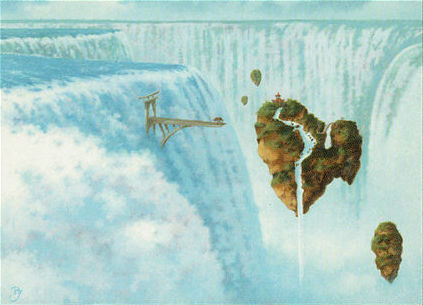

Working with 192 images
Image examples: 
basiclandart_swamp_tumblr_o1o77iti7L1v6w6n4o1_640.jpg


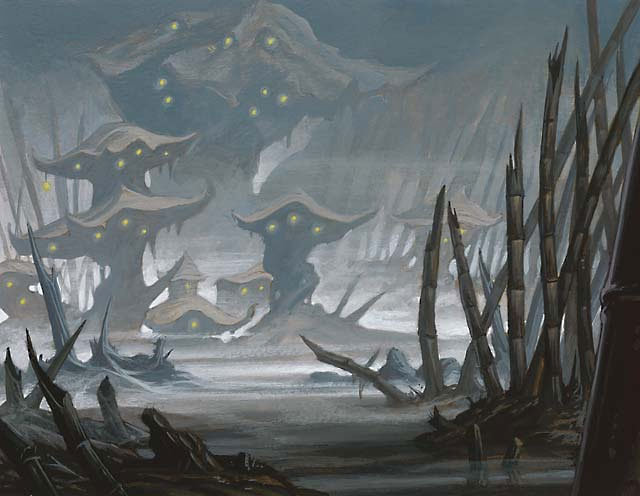

basiclandart_swamp_tumblr_o1m9zmARa51v6w6n4o1_640.jpg


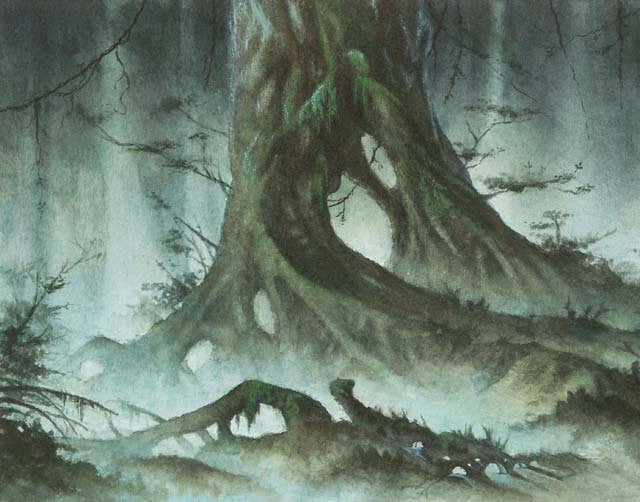

Working with 172 images
Image examples: 
basiclandart_swamp_tumblr_o1xb5eR1jP1v6w6n4o1_1280.jpg


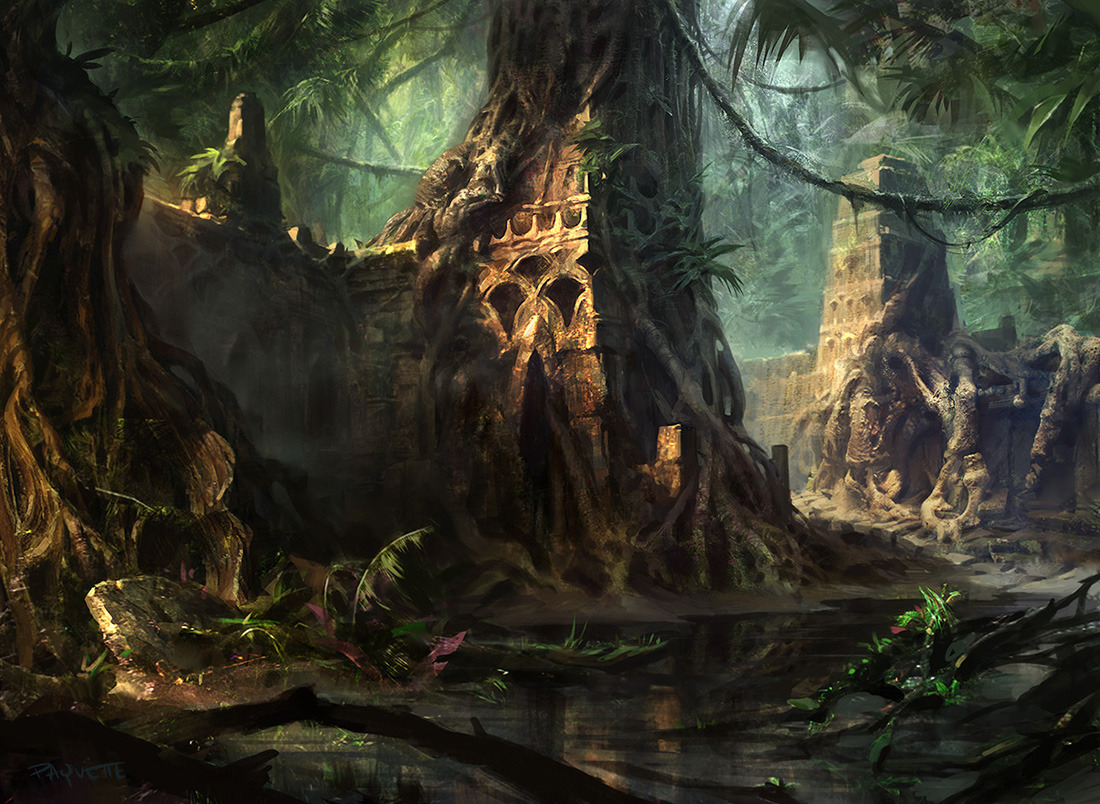

basiclandart_swamp_tumblr_o1vm21PBV11v6w6n4o1_1280.jpg


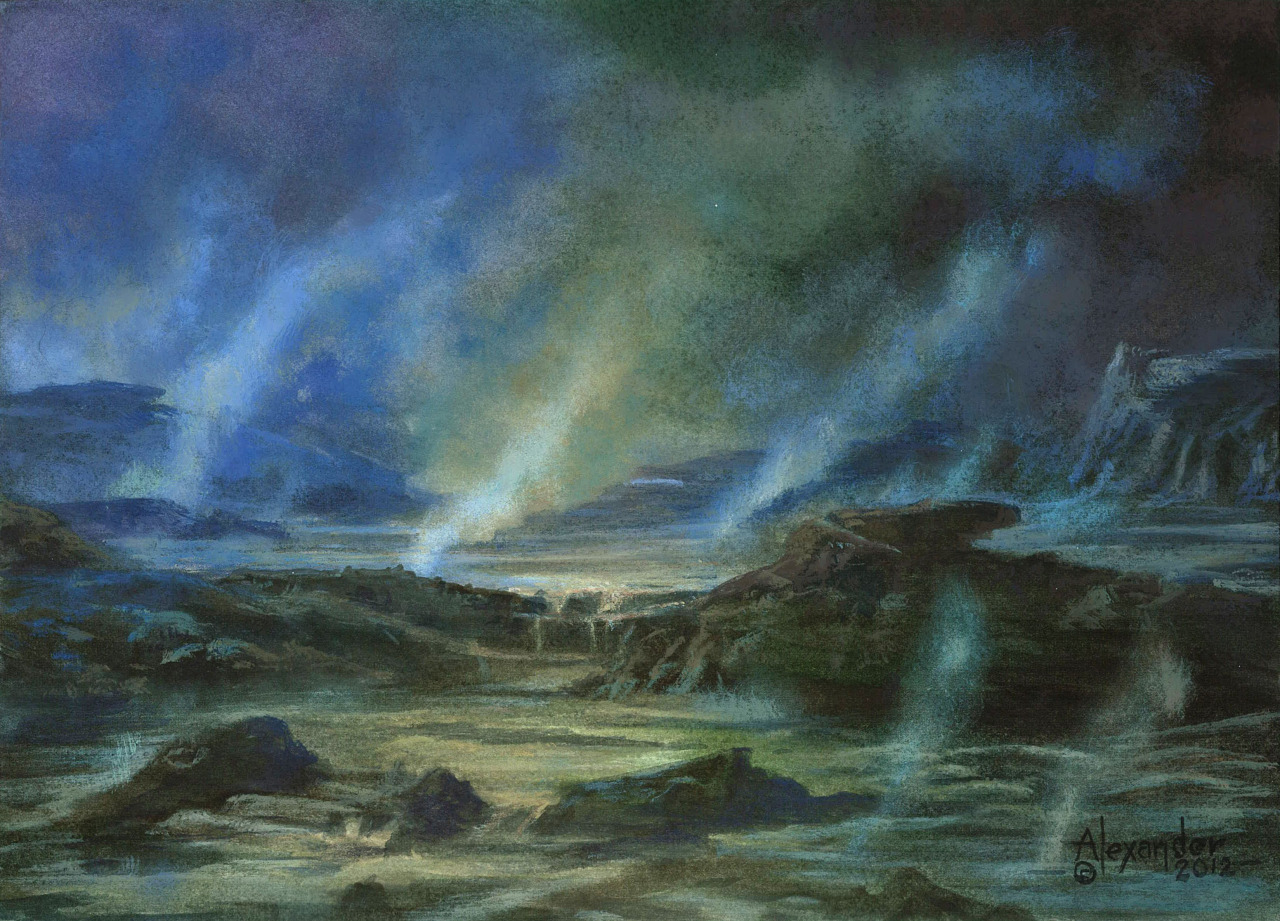

Working with 20 images
Image examples: 
basiclandart_swamp_tumblr_pei51rQIsG1v6w6n4o1_640.jpg


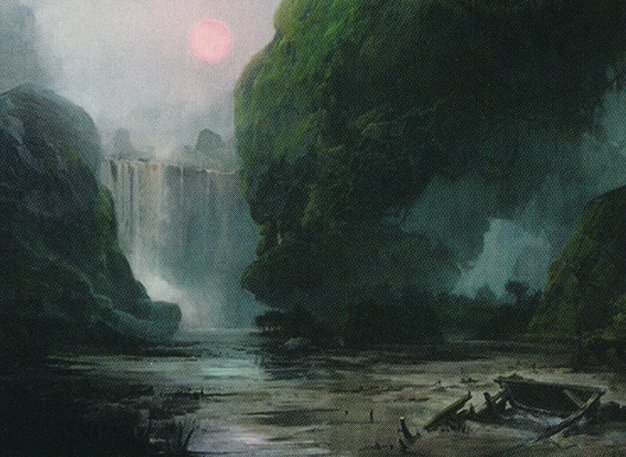

basiclandart_swamp_tumblr_o1kf3nBta81v6w6n4o1_400.jpg


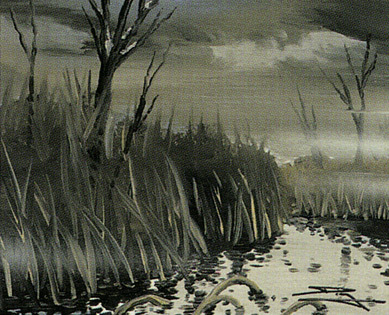

Working with 195 images
Image examples: 
basiclandart_mountain_tumblr_o1o7gdkAA11v6w6n4o1_500.jpg


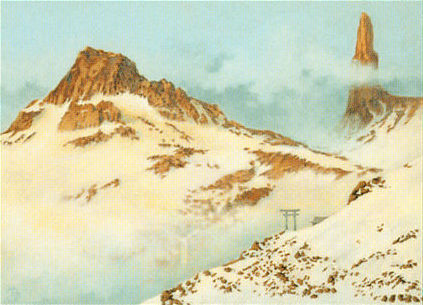

basiclandart_mountain_tumblr_o1mafuAgYf1v6w6n4o1_640.jpg


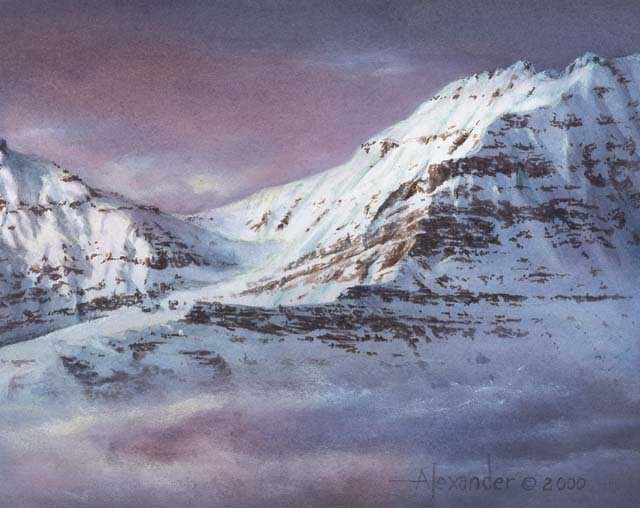

Working with 175 images
Image examples: 
basiclandart_mountain_tumblr_o1mafuAgYf1v6w6n4o1_640.jpg


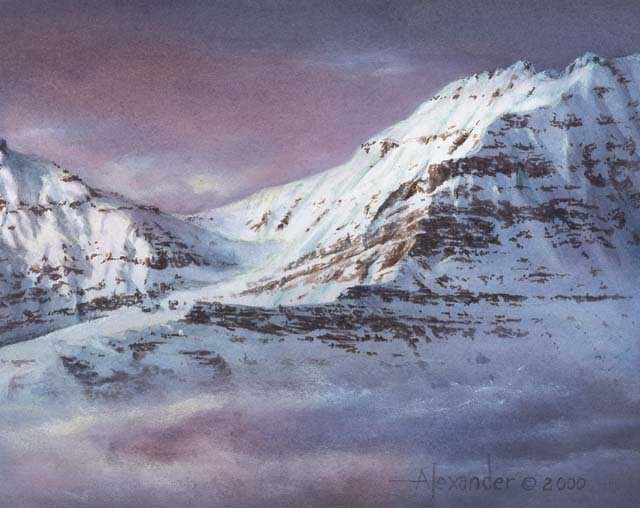

basiclandart_mountain_tumblr_o1xb66OS0V1v6w6n4o1_1280.jpg


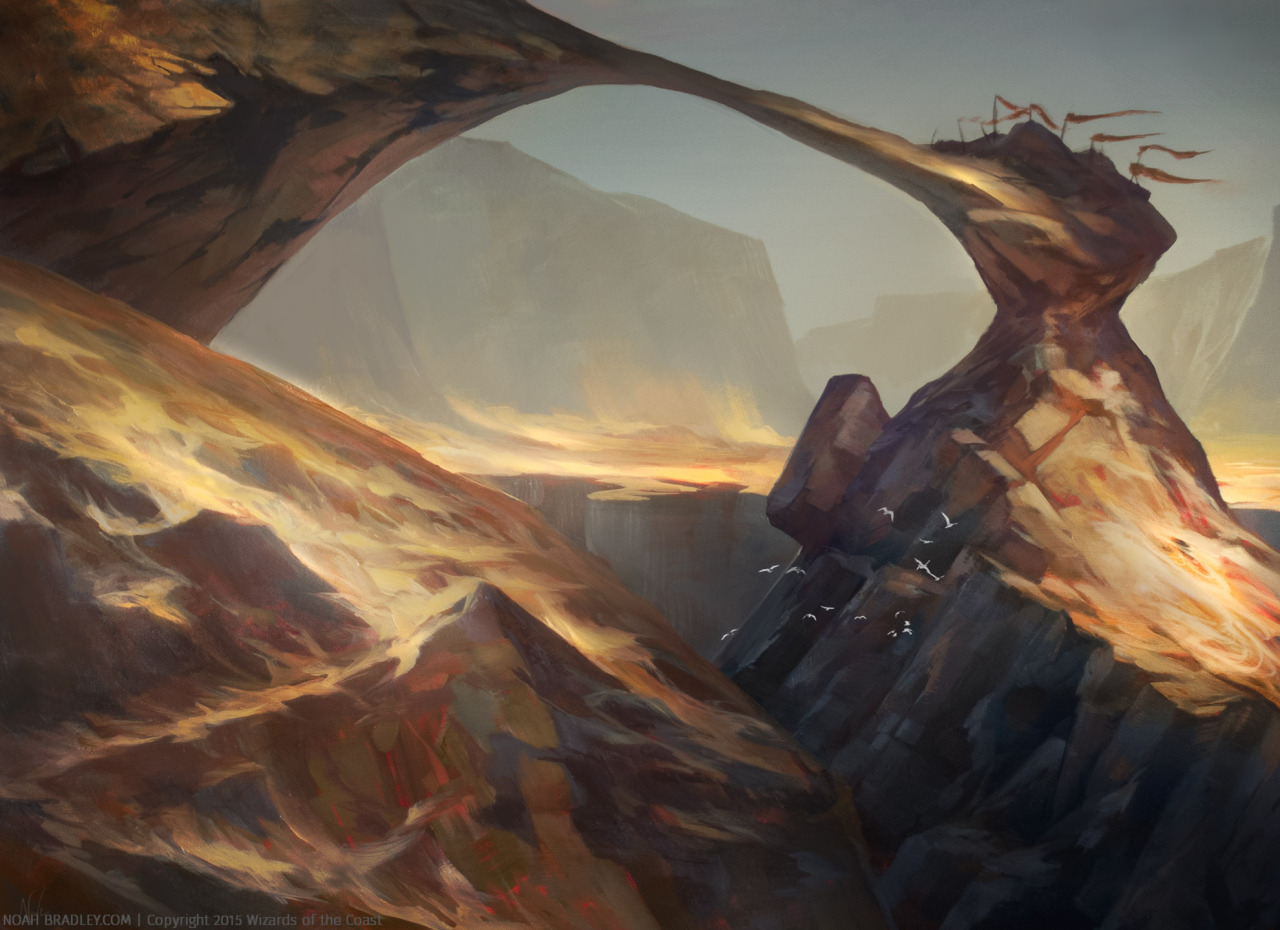

Working with 20 images
Image examples: 
basiclandart_mountain_tumblr_p7lylfiIDw1v6w6n4o1_1280.png


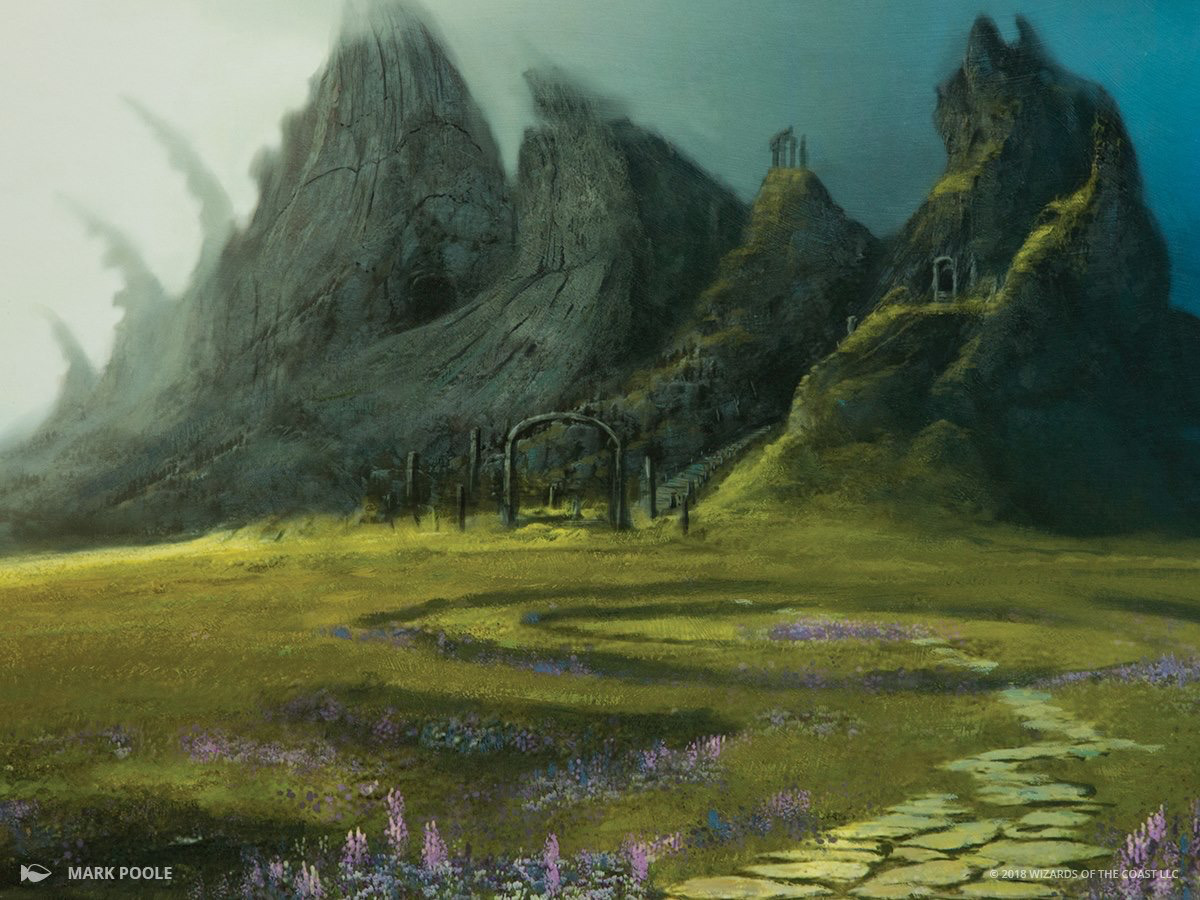

basiclandart_mountain_tumblr_o1xb72HWQ41v6w6n4o1_640.jpg


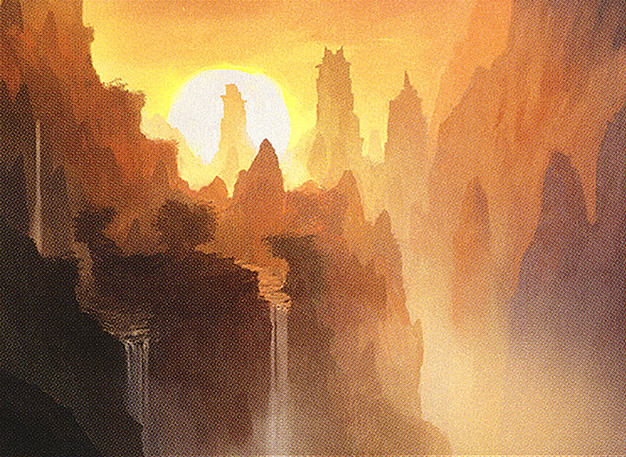

Working with 195 images
Image examples: 
basiclandart_forest_tumblr_p71r2ioEUf1v6w6n4o1_r1_1280.jpg


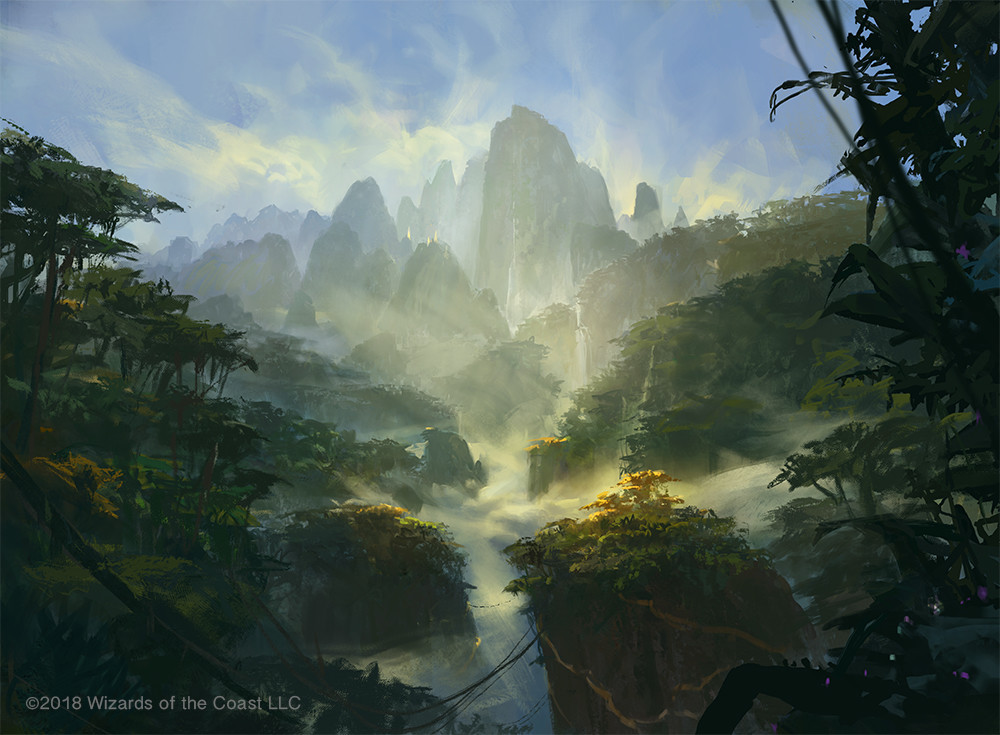

basiclandart_forest_tumblr_o1o4npfLJu1v6w6n4o1_400.jpg


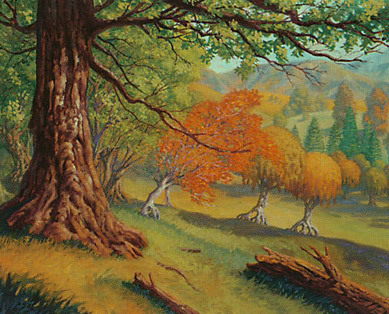

Working with 175 images
Image examples: 
basiclandart_forest_tumblr_o1pyhl5yLL1v6w6n4o1_1280.jpg


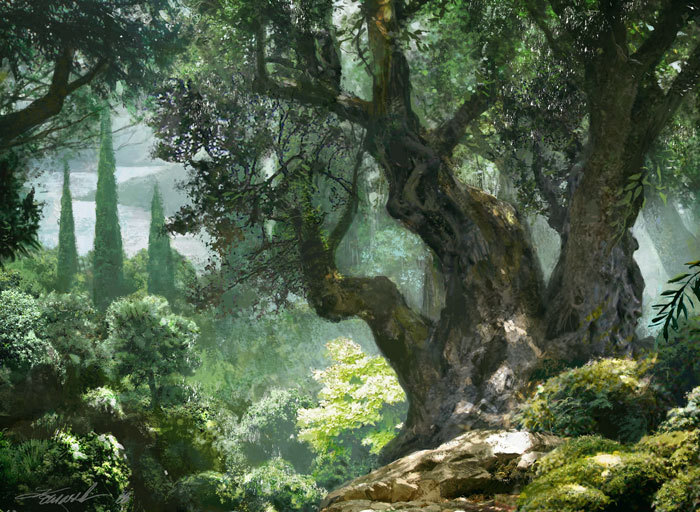

basiclandart_forest_tumblr_o1q0776K6I1v6w6n4o1_1280.jpg


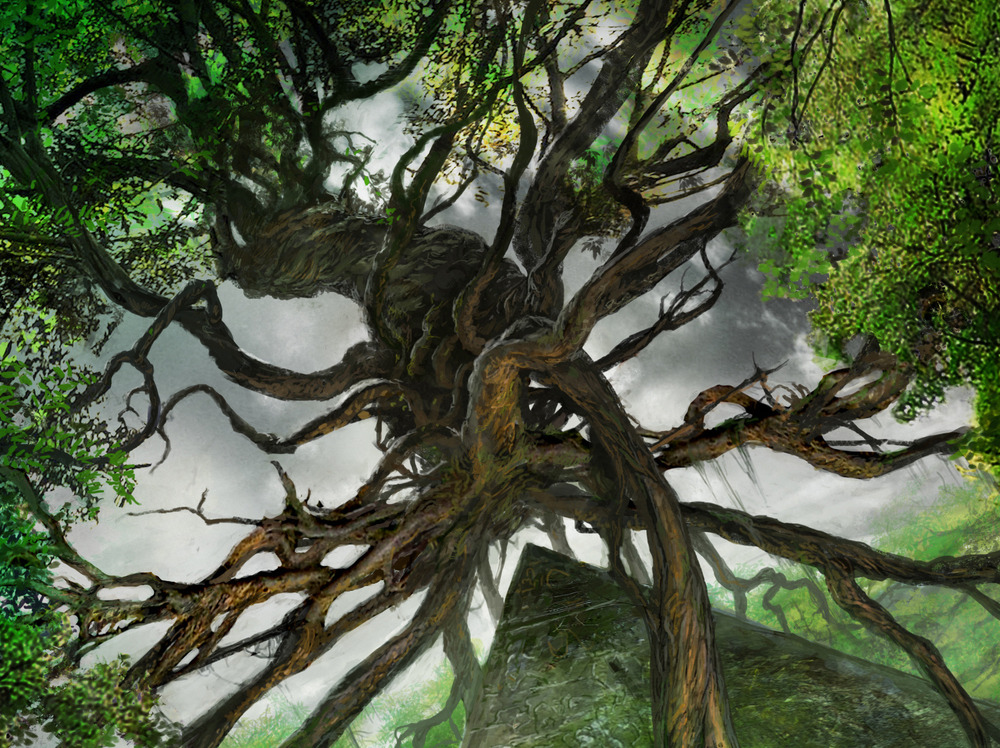

Working with 20 images
Image examples: 
basiclandart_forest_tumblr_o1xeptgoez1v6w6n4o1_1280.jpg


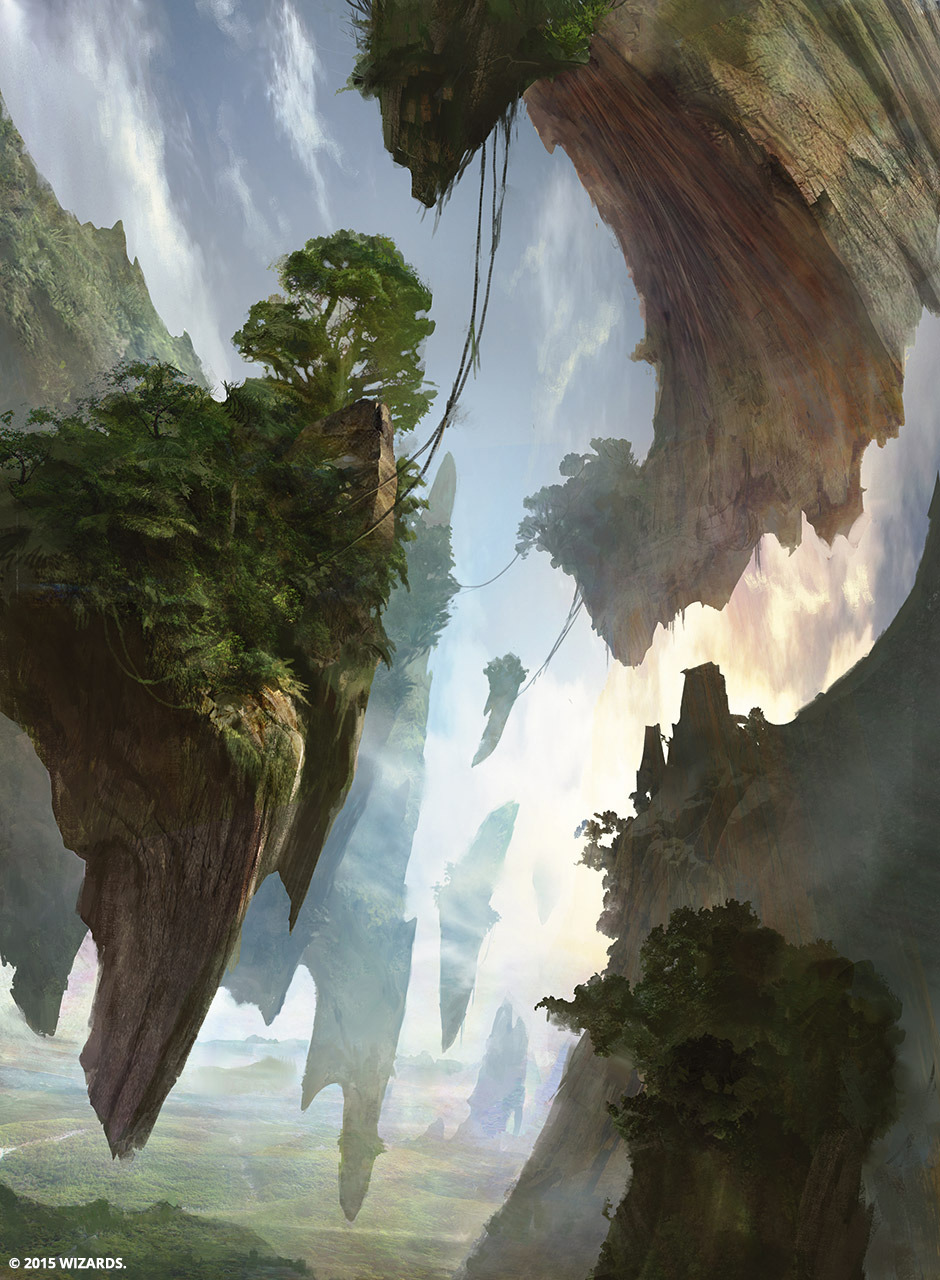

basiclandart_forest_tumblr_o1m9lhQlYp1v6w6n4o1_1280.jpg


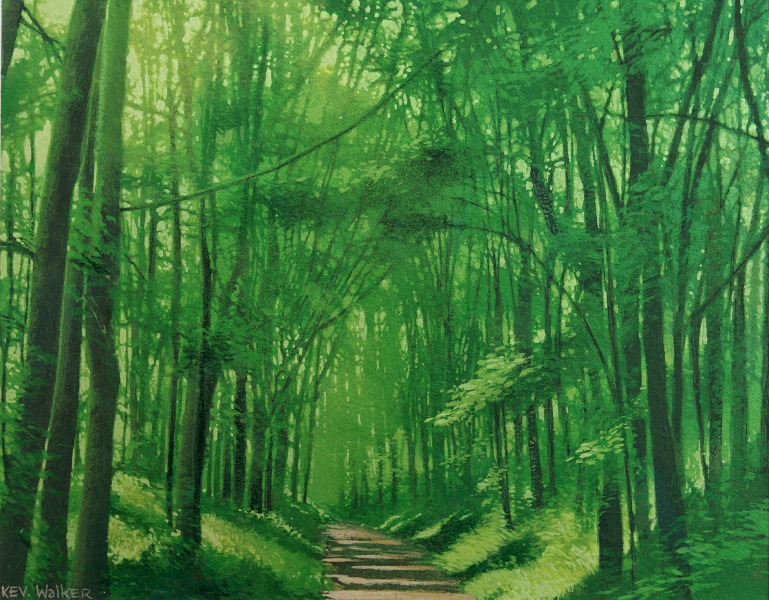

In [3]:
# Take a quick look at some of the images for each class

for i in ['plains', 'island', 'swamp', 'mountain', 'forest']:
    
    folder_raw = "data/" + i
    folder_train = "training_set/" + i
    folder_test = "test_set/" + i
    
    for folder in [folder_raw, folder_train, folder_test]:
        
        onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

        print("Working with {0} images".format(len(onlyfiles)))
        print("Image examples: ")

        for i in range(5, 7):
            print(onlyfiles[i])
            display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [4]:
# Creating initial object for sequential network model
classifier = Sequential()

# Adding Conv2D convolutional layer
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Adding pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten
classifier.add(Flatten())

# Create hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Intialise output layer with 5 nodes for each basic land type
classifier.add(Dense(units = 5, activation = 'sigmoid'))

# Compile the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [5]:
# Using keras image preprocessing to synthesize extra training/test data with augmentations

train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')

Found 870 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [6]:
# Fit the model to the training data

classifier.fit_generator(training_set,
steps_per_epoch = 8000,
epochs = 25,
validation_data = test_set,
validation_steps = 2000)

Epoch 1/25
1371/8000 [====>.........................] - ETA: 43:14 - loss: 0.1957 - acc: 0.9208

KeyboardInterrupt: 